In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM

from xga.relations.fit import scaling_relation_lira
from xga import DEFAULT_COSMO

In [2]:
sample = pd.read_csv("xcs3p_sdssrm_clusters.csv")
sample = sample[['name', 'z']]
sample

,name,z
0,SDSSXCS-124,0.247483
1,SDSSXCS-2789,0.105285
2,SDSSXCS-290,0.348495
3,SDSSXCS-1018,0.214403
4,SDSSXCS-134,0.277304
...,...,...
145,SDSSXCS-2092,0.328201
146,SDSSXCS-17923,0.314943
147,SDSSXCS-68,0.300570
148,SDSSXCS-147,0.259350


In [3]:
masses = pd.read_csv("sdssrm-xcs_masses.csv")
masses

,name,Mhy500,Mhy500-,Mhy500+,Mg500,Mg500-,Mg500+,Mhy2500,Mhy2500-,Mhy2500+,...,Mhy500_wraderr+,Mg500_wraderr,Mg500_wraderr-,Mg500_wraderr+,Mhy2500_wraderr,Mhy2500_wraderr-,Mhy2500_wraderr+,Mg2500_wraderr,Mg2500_wraderr-,Mg2500_wraderr+
0,SDSSXCS-124,7.634491,1.286289,1.029318,0.869914,0.002841,0.005951,2.621329,0.112240,0.137975,...,1.041261,0.870390,0.015662,0.016223,2.621462,0.113380,0.138668,0.321697,0.007076,0.007250
1,SDSSXCS-2789,7.820374,1.259755,1.447212,0.218603,0.002491,0.002496,1.602926,0.101929,0.109311,...,1.456225,0.218499,0.002874,0.002963,1.602810,0.102195,0.110153,0.097399,0.001819,0.001737
2,SDSSXCS-290,2.961604,0.369827,0.382523,0.427969,0.002132,0.002098,1.467429,0.175603,0.290465,...,0.420849,0.427478,0.019454,0.019887,1.469441,0.177871,0.288247,0.134133,0.005839,0.005993
3,SDSSXCS-1018,5.067958,1.015270,0.969362,0.210208,0.001929,0.001917,1.128892,0.103503,0.149913,...,0.973924,0.210059,0.003374,0.003431,1.128619,0.104011,0.149860,0.084350,0.002327,0.002330
4,SDSSXCS-134,6.802619,0.782566,0.772819,0.767290,0.002149,0.002170,3.043225,0.113304,0.110341,...,0.781372,0.767157,0.010866,0.010814,3.042067,0.125878,0.124549,0.313911,0.007265,0.007068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,SDSSXCS-2092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,SDSSXCS-17923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,SDSSXCS-68,7.450607,0.767249,0.769341,0.866620,0.003494,0.003561,2.925366,0.210740,0.222969,...,0.797112,0.866319,0.019615,0.019060,2.925836,0.214431,0.224624,0.309140,0.011104,0.010986
148,SDSSXCS-147,8.571155,1.720791,1.848874,0.558687,0.002662,0.002508,2.090692,0.123170,0.131449,...,1.854716,0.558438,0.007220,0.007275,2.090275,0.123725,0.133519,0.203258,0.005389,0.005588


In [4]:
txlx = pd.read_csv("sdssrm-xcs_r500_r2500_txlx.csv")
txlx

,name,Tx_500,Tx_500-,Tx_500+,Lx52_500,Lx52_500-,Lx52_500+,Lxbol_500,Lxbol_500-,Lxbol_500+,...,Lxbol_2500+,Tx_500ce,Tx_500ce-,Tx_500ce+,Lx52_500ce,Lx52_500ce-,Lx52_500ce+,Lxbol_500ce,Lxbol_500ce-,Lxbol_500ce+
0,SDSSXCS-124,6.92000,0.116389,0.111642,5.310408e+44,2.494586e+42,3.193270e+42,2.039754e+45,2.082091e+43,1.712354e+43,...,1.166420e+43,6.78098,0.134306,0.158223,3.684827e+44,2.702225e+42,2.572964e+42,1.401501e+45,1.425781e+43,1.280567e+43
1,SDSSXCS-2789,4.54033,0.073600,0.074023,1.029575e+44,5.149604e+41,6.858712e+41,3.213527e+44,3.914562e+42,3.124017e+42,...,1.642524e+42,4.65452,0.108600,0.113677,6.943669e+43,6.482835e+41,5.773788e+41,2.192642e+44,2.960496e+42,2.652251e+42
2,SDSSXCS-290,5.31681,0.297854,0.336308,2.856695e+44,5.917234e+42,7.322989e+42,9.632533e+44,4.005991e+43,3.207763e+43,...,1.983518e+43,5.44819,0.407899,0.486340,1.972104e+44,6.434636e+42,6.092122e+42,6.734043e+44,3.038773e+43,2.687861e+43
3,SDSSXCS-1018,3.90154,0.143544,0.151498,8.044819e+43,1.441322e+42,9.241468e+41,2.335851e+44,6.385493e+42,4.924304e+42,...,3.542190e+42,3.93098,0.207281,0.230478,5.048987e+43,1.253282e+42,1.066663e+42,1.471118e+44,5.740520e+42,4.871391e+42
4,SDSSXCS-134,6.72622,0.116523,0.116565,4.811899e+44,2.458557e+42,3.050440e+42,1.825296e+45,2.068757e+43,1.639058e+43,...,1.208755e+43,6.37686,0.135837,0.153820,3.447715e+44,2.713877e+42,2.497416e+42,1.273855e+45,1.415497e+43,1.228583e+43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,SDSSXCS-2092,3.79017,0.234418,0.265267,8.507384e+43,2.153001e+42,1.925166e+42,2.425621e+44,9.439427e+42,9.607359e+42,...,4.620996e+42,3.58013,0.253297,0.279152,7.037335e+43,2.356232e+42,2.817503e+42,1.953502e+44,1.225976e+43,9.732789e+42
146,SDSSXCS-17923,1.68417,0.245752,0.550398,7.755466e+42,9.520020e+41,1.111606e+42,1.614707e+43,2.320731e+42,3.846246e+42,...,NaN,1.77149,0.336926,1.045218,6.951204e+42,8.835356e+41,1.694832e+42,1.470883e+43,2.877923e+42,3.234687e+42
147,SDSSXCS-68,7.21798,0.216971,0.242867,5.482638e+44,5.443439e+42,5.266283e+42,2.154522e+45,3.573123e+43,2.780801e+43,...,2.018159e+43,6.83212,0.229555,0.269495,4.319980e+44,4.426235e+42,6.280274e+42,1.652174e+45,2.672619e+43,3.125907e+43
148,SDSSXCS-147,6.64629,0.183144,0.183515,2.494748e+44,1.676759e+42,2.115683e+42,9.400180e+44,1.473611e+43,1.108811e+43,...,6.686470e+42,6.48980,0.225047,0.231252,1.873305e+44,2.473238e+42,1.654051e+42,6.977462e+44,1.603194e+43,1.384188e+43


In [5]:
comb = pd.merge(sample, txlx, on='name')
comb = pd.merge(comb, masses)
comb

,name,z,Tx_500,Tx_500-,Tx_500+,Lx52_500,Lx52_500-,Lx52_500+,Lxbol_500,Lxbol_500-,...,Mhy500_wraderr+,Mg500_wraderr,Mg500_wraderr-,Mg500_wraderr+,Mhy2500_wraderr,Mhy2500_wraderr-,Mhy2500_wraderr+,Mg2500_wraderr,Mg2500_wraderr-,Mg2500_wraderr+
0,SDSSXCS-124,0.247483,6.92000,0.116389,0.111642,5.310408e+44,2.494586e+42,3.193270e+42,2.039754e+45,2.082091e+43,...,1.041261,0.870390,0.015662,0.016223,2.621462,0.113380,0.138668,0.321697,0.007076,0.007250
1,SDSSXCS-2789,0.105285,4.54033,0.073600,0.074023,1.029575e+44,5.149604e+41,6.858712e+41,3.213527e+44,3.914562e+42,...,1.456225,0.218499,0.002874,0.002963,1.602810,0.102195,0.110153,0.097399,0.001819,0.001737
2,SDSSXCS-290,0.348495,5.31681,0.297854,0.336308,2.856695e+44,5.917234e+42,7.322989e+42,9.632533e+44,4.005991e+43,...,0.420849,0.427478,0.019454,0.019887,1.469441,0.177871,0.288247,0.134133,0.005839,0.005993
3,SDSSXCS-1018,0.214403,3.90154,0.143544,0.151498,8.044819e+43,1.441322e+42,9.241468e+41,2.335851e+44,6.385493e+42,...,0.973924,0.210059,0.003374,0.003431,1.128619,0.104011,0.149860,0.084350,0.002327,0.002330
4,SDSSXCS-134,0.277304,6.72622,0.116523,0.116565,4.811899e+44,2.458557e+42,3.050440e+42,1.825296e+45,2.068757e+43,...,0.781372,0.767157,0.010866,0.010814,3.042067,0.125878,0.124549,0.313911,0.007265,0.007068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,SDSSXCS-2092,0.328201,3.79017,0.234418,0.265267,8.507384e+43,2.153001e+42,1.925166e+42,2.425621e+44,9.439427e+42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,SDSSXCS-17923,0.314943,1.68417,0.245752,0.550398,7.755466e+42,9.520020e+41,1.111606e+42,1.614707e+43,2.320731e+42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,SDSSXCS-68,0.300570,7.21798,0.216971,0.242867,5.482638e+44,5.443439e+42,5.266283e+42,2.154522e+45,3.573123e+43,...,0.797112,0.866319,0.019615,0.019060,2.925836,0.214431,0.224624,0.309140,0.011104,0.010986
148,SDSSXCS-147,0.259350,6.64629,0.183144,0.183515,2.494748e+44,1.676759e+42,2.115683e+42,9.400180e+44,1.473611e+43,...,1.854716,0.558438,0.007220,0.007275,2.090275,0.123725,0.133519,0.203258,0.005389,0.005588


In [6]:
e_val = DEFAULT_COSMO.efunc(comb['z'].values)
mgas = Quantity(comb[['Mg2500_wraderr', 'Mg2500_wraderr-', 'Mg2500_wraderr+']].values*1e+13, 
                'Msun')*e_val[..., None]

tx = Quantity(comb[['Tx_2500', 'Tx_2500-', 'Tx_2500+']].values, 'keV')

In [7]:
mgas

<Quantity [[3.64299932e+12, 8.01320870e+10, 8.20998945e+10],
           [1.02389176e+12, 1.91253089e+10, 1.82646725e+10],
           [1.60715990e+12, 6.99573826e+10, 7.18131475e+10],
           [9.38256223e+11, 2.58872256e+10, 2.59190735e+10],
           [3.61363550e+12, 8.36286412e+10, 8.13586625e+10],
           [           nan,            nan,            nan],
           [3.87830879e+12, 1.00439119e+11, 1.00537192e+11],
           [4.97863408e+11, 2.57230553e+10, 2.57634462e+10],
           [1.98159701e+12, 5.08231800e+10, 5.27807938e+10],
           [4.46450904e+11, 1.90033063e+10, 1.83994812e+10],
           [           nan,            nan,            nan],
           [4.36460015e+11, 7.28261983e+10, 7.65298972e+10],
           [1.28819550e+12, 2.37663073e+10, 2.34417645e+10],
           [           nan,            nan,            nan],
           [           nan,            nan,            nan],
           [2.11182705e+12, 4.59728065e+10, 4.70533275e+10],
           [1.56424409e+

In [8]:
t_norm = np.nanmedian(tx[:, 0])
mg_norm = np.nanmedian(mgas[:, 0])
print(t_norm)
print(mg_norm.to('1e+13Msun'))

3.75881 keV
0.12881955040685092 1e+13 solMass


In [9]:
mgas_tx = scaling_relation_lira(mgas[:, 0], mgas[:, 1:], tx[:, 0], tx[:, 1:], mg_norm, t_norm, 
                                y_name=r"$E(z)M^{\rm{gas}}_{2500}$", x_name=r"$T_{\rm{X,2500}}$", dim_hubb_ind=1)

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 59 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))
R[write to console]: module mix loaded



  |**************************************************| 100%


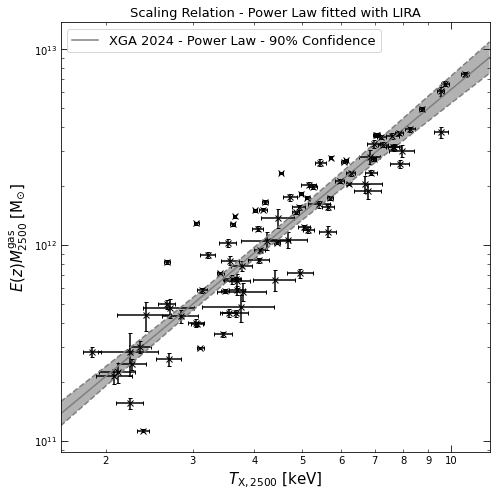

In [10]:
mgas_tx.view(figsize=(7, 7))

In [11]:
mgas_tx.pars

array([[2.09502672, 0.09069528],
       [0.62040955, 0.0254019 ]])

In [12]:
mgas_tx.x_norm.value

3.75881

In [13]:
mgas_tx.y_norm

<Quantity 1.2881955e+12 solMass>